In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("Heart Attack.csv")

In [3]:
labelencodercalss = preprocessing.LabelEncoder()
df["class"] = labelencodercalss.fit_transform(df["class"])

In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

lowerbound = Q1 - IQR *1.5
upperbound = Q3 + IQR *1.5

In [5]:
df_no_outlier = df[~((df<lowerbound)|(df>upperbound)).any(axis=1)]

In [6]:
df_no_outlier.shape

(789, 9)

In [7]:
# X = df_no_outlier.drop(["class"],axis=1)
# y = df_no_outlier["class"]

In [8]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)
# modelgbr = GradientBoostingClassifier(random_state=42)
# modelgbr.fit(X_train,y_train)
# predictiongbr = modelgbr.predict(X_test)

In [9]:
# print(classification_report(y_test,predictiongbr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       184
           1       0.98      0.95      0.97       132

    accuracy                           0.97       316
   macro avg       0.98      0.97      0.97       316
weighted avg       0.97      0.97      0.97       316



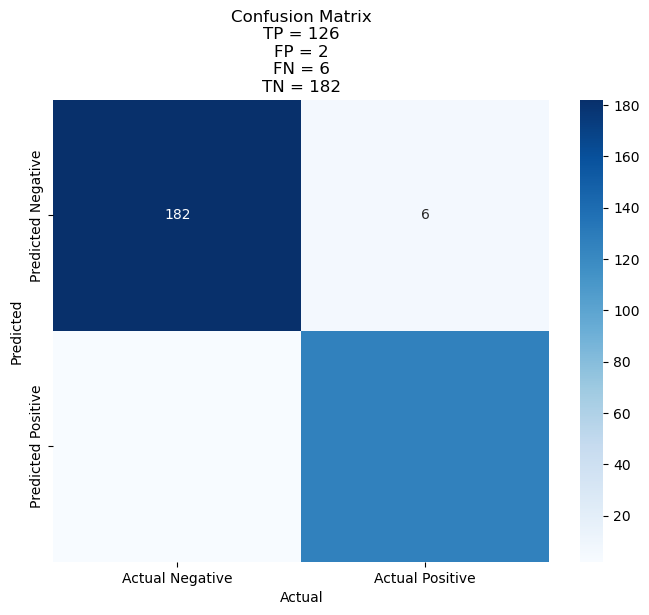

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_no_outlier contains your dataset
X = df_no_outlier.drop(["class"], axis=1)
y = df_no_outlier["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
modelgbr = GradientBoostingClassifier(random_state=42)
modelgbr.fit(X_train, y_train)
predictiongbr = modelgbr.predict(X_test)

print(classification_report(y_test, predictiongbr))

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, predictiongbr, labels=modelgbr.classes_)

# Extract TP, FP, FN, TN from the confusion matrix
TP = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]
TN = confusion[0, 0]

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion.T, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix\nTP = {}\nFP = {}\nFN = {}\nTN = {}'.format(TP, FP, FN, TN))
plt.show()


In [11]:
# import joblib

# # Save the model using joblib
# joblib.dump(modelgbr, 'modelgbr.joblib')

In [ ]:
# import pickle

# # Save the model using pickle
# with open('modelgbr.pkl', 'wb') as model_file:
#     pickle.dump(modelgbr, model_file)

AUC: 1.00


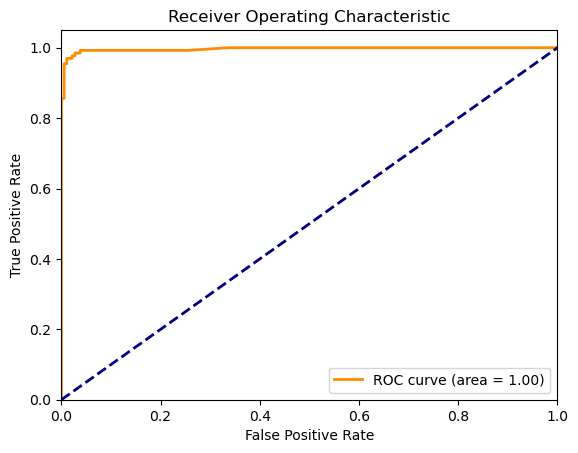

In [12]:
from sklearn.preprocessing import minmax_scale, scale, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_auc_score,roc_curve, auc
# Menggunakan predict_proba pada objek modelgbr
probas = modelgbr.predict_proba(X_test)[:, 1]  # Ambil probabilitas kelas positif

fpr, tpr, _ =   roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt

# Cetak AUC
print("AUC: {:.2f}".format(roc_auc))

# Gambarkan kurva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()